In [1]:
from keras.models import load_model
from keras import backend as K

Using TensorFlow backend.


In [2]:
model = load_model("model.h5")

In [3]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
CropTopBottom (Cropping2D)       (None, 80, 320, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
Scale (AveragePooling2D)         (None, 80, 160, 3)    0           CropTopBottom[0][0]              
____________________________________________________________________________________________________
Normalize (Lambda)               (None, 80, 160, 3)    0           Scale[0][0]                      
____________________________________________________________________________________________________
ColorConversion (Convolution2D)  (None, 80, 160, 3)    12          Normalize[0][0]                  
___________________________________________________________________________________________

In [4]:
from keras.utils.visualize_util import plot
plot(model, show_shapes=True, to_file='model.png')

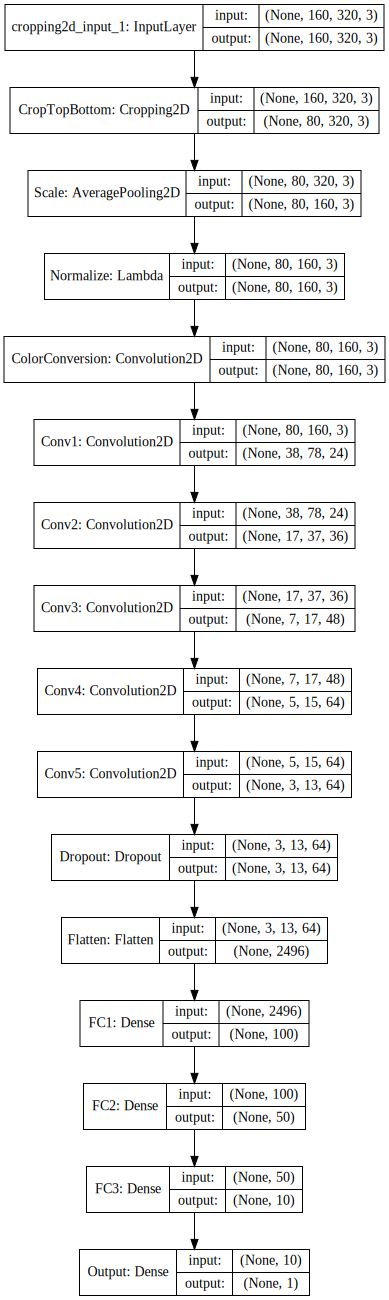

In [5]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [37]:
import matplotlib.image as mpimg

img = mpimg.imread('data/udacity/IMG/center_2016_12_01_13_31_13_037.jpg')

get_crop_layer_output = K.function([model.layers[0].input], [model.layers[0].output])
get_scale_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
get_color_layer_output = K.function([model.layers[0].input], [model.layers[3].output])

crop_output = get_crop_layer_output([[img]])[0][0] * 255
scale_output = get_scale_layer_output([[img]])[0][0] * 255
color_output = get_color_layer_output([[img]])[0][0]

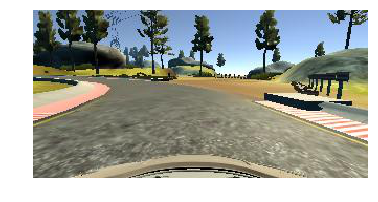

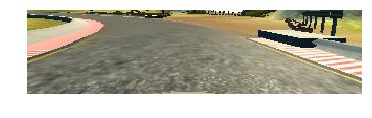

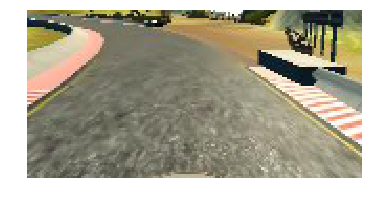

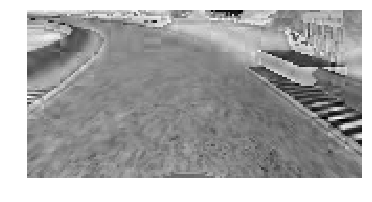

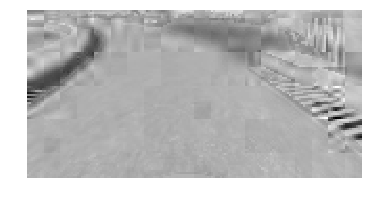

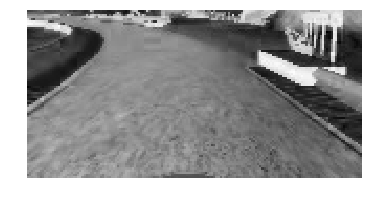

In [39]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(crop_output)
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(scale_output)
plt.axis('off')
plt.show()

for i in range(3):
    plt.figure()
    plt.imshow(color_output[:,:,i],cmap='gray')
    plt.axis('off')
    plt.show()